# Universidad Nacional de Córdoba 
# Facultad de Matemática, Astronomía, Física y Computación
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2022
# Predicción de incidendes viales en la ciudad de Medellin

> Mentora: Isabel Mejia

> Estudiantes: Candela Spitale | Gustavo Venchiarutti | Carina Giovine


Se trabaja con un dataset del portal de datos de la ciudad de Medellin-MEData
[Victimas de Incidentes viales](http://medata.gov.co/dataset/v%C3%ADctimas-en-incidentes-viales)


#Informe de Exploración y curación de datos
# General
Se propone la elaboración de un informe o presentación en formato, donde se vaya detallando cada exploración y curación de datos que se vaya realizando.

Hemos venido realizando un análisis y visualzación de datos, donde:

* Se analizó el significado de cada variable.
* Se clasificó cada variable.
* Se analizó la existencia de valores inválidos.
* Se unificaron valores de algunas variables.
* Se crearon gráficos de análisis y de visualización. Se interpretaron.

En los gráficos mencionados, para poder visualizar mejor los datos, se adelantó la aplicación de algunas técnicas de EyCD:

* Se analizó la existencia de datos nulos de cada variable. Ninguna tenía.
* Se convirtieron los valores faltantes 'Sin Inf' a datos nulos en algunas variables, para poder transformar su tipo luego.
* `Edad`, `Hora`, `Radicado`, `Latitud` y `Longitud` se transformaron de tipo object a tipo **float64**.
* `Fecha_incidente` se transformó de tipo object a tipo **datetime64**.

En esta ocasión, para complementar el análisis y visualización (1) e implementar técnicas de exploración y curación de datos, haremos lo siguiente:

1. Revisar datos atípicos, mirar qué porcentaje es del dataset, decidir que hacer con ellos, eliminarlos o no? 
2. Ver si hay una relación entre los datos nulos, porque puede ser un error al ingresar datos. Analizar posibles imputaciones. Hacer conclusiones.

Dejamos a disposición el link del Google Colaboratory para poder visualizar el gráfico final https://colab.research.google.com/drive/1W04CWXxsF3AONRdoMZ94rHXe4inpcMzi?usp=sharing

### Instalación e importación de librerías, importación del dataset

In [1]:
# Cliquear Restart Runtime luego de ejecutar la siguiente celda y ejecutar todo de nuevo
!pip install geopandas
!pip install geopy
!pip install folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim
import plotly.graph_objects as go
from branca.element import Figure
import folium
from folium.plugins import HeatMapWithTime
from shapely.geometry import Point

In [3]:
# Leemos el conjunto de datos obtenido del tp 1 y creamos el dataframe.
URL = 'https://drive.google.com/file/d/1j_cqL73asM4qsXEQ2eqZuWG1q8-HP7lA/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
invia_df = pd.read_csv(path)

In [4]:
invia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235843 entries, 0 to 235842
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gravedad_victima     235843 non-null  object 
 1   Fecha_incidente      235843 non-null  object 
 2   Hora_incidente       235843 non-null  object 
 3   Clase_incidente      235843 non-null  object 
 4   Direccion_incidente  235831 non-null  object 
 5   Sexo                 235843 non-null  object 
 6   Edad                 233429 non-null  float64
 7   Condicion            235843 non-null  object 
 8   Mes                  235843 non-null  object 
 9   Dia                  235843 non-null  object 
 10  Num_dia              235842 non-null  float64
 11  Hora                 235836 non-null  float64
 12  Grupo_edad           235843 non-null  object 
 13  Año                  235843 non-null  int64  
 14  Radicado             235794 non-null  float64
 15  Latitud          

1. Revisar datos atípicos, mirar qué porcentaje es del dataset, decidir que hacer con ellos, eliminarlos o no? 

---

### Tratamiento de valores atípicos restantes en variables categóricas

In [171]:
invia_df.Fecha_incidente.unique()

array(['2014-01-01T00:00:00.000000000', '2014-01-02T00:00:00.000000000',
       '2014-01-03T00:00:00.000000000', ...,
       '2021-09-28T00:00:00.000000000', '2021-09-29T00:00:00.000000000',
       '2021-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [172]:
# Convertimos nuevamente el tipo de la variable Fecha_Incidente a datetime que al pasar a csv se transformó a tipo object
invia_df.Fecha_incidente = pd.to_datetime(invia_df.Fecha_incidente, dayfirst=True, format='%Y-%m-%d')
print('Fecha_incidente = {}'.format(invia_df.Fecha_incidente.unique()))

Fecha_incidente = ['2014-01-01T00:00:00.000000000' '2014-01-02T00:00:00.000000000'
 '2014-01-03T00:00:00.000000000' ... '2021-09-28T00:00:00.000000000'
 '2021-09-29T00:00:00.000000000' '2021-09-30T00:00:00.000000000']


En el trabajo de análisis y visualización de datos vimos que bastantes columnas tienen valores que contienen a `Sin Inf` o similar. Estos son datos atípicos. Veremos en cuáles columnas los convertiremos en nulos para poder trabajar con estos valores luego.

In [173]:
invia_df.isnull().sum()

Gravedad_victima           0
Fecha_incidente            0
Hora_incidente             0
Clase_incidente            0
Direccion_incidente       12
Sexo                       0
Edad                    2414
Condicion                  0
Mes                        0
Dia                        0
Num_dia                    1
Hora                       7
Grupo_edad                 0
Año                        0
Radicado                  49
Latitud                20845
Longitud               20845
Comuna                     0
Barrio                   618
dtype: int64

In [174]:
invia_notnull_df = invia_df.dropna()
invia_notnull_df.isnull().sum()

Gravedad_victima       0
Fecha_incidente        0
Hora_incidente         0
Clase_incidente        0
Direccion_incidente    0
Sexo                   0
Edad                   0
Condicion              0
Mes                    0
Dia                    0
Num_dia                0
Hora                   0
Grupo_edad             0
Año                    0
Radicado               0
Latitud                0
Longitud               0
Comuna                 0
Barrio                 0
dtype: int64

In [175]:
object_columns = invia_notnull_df.select_dtypes(include=['object']).columns.to_numpy()
object_columns

array(['Gravedad_victima', 'Hora_incidente', 'Clase_incidente',
       'Direccion_incidente', 'Sexo', 'Condicion', 'Mes', 'Dia',
       'Grupo_edad', 'Comuna', 'Barrio'], dtype=object)

In [176]:
invalid_values = []
for col in object_columns:
  invalid_values_col = invia_notnull_df[invia_notnull_df[col].str.contains('Sin Inf', case=False)][col].unique()
  invalid_values.append(invalid_values_col)
invalid_values

[array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array(['Sin Inf'], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array(['Sin Inf'], dtype=object),
 array(['Sin Inf'], dtype=object),
 array(['Sin Inf', '15Sin Inf3', '1Sin Inf2Sin Inf', '14Sin Inf8',
        '1Sin Inf18', '1Sin Inf19', '15Sin Inf7', 'Sin Inf3Sin Inf7',
        '15Sin Inf4', 'Sin Inf31Sin Inf', '1Sin InfSin Inf7', '1Sin Inf11',
        'Sin Inf312', 'Sin Inf9Sin Inf7', '12Sin Inf4', 'Sin Inf514',
        '151Sin Inf', 'Sin Inf2Sin Inf5', 'Sin Inf4Sin Inf8',
        'Sin Inf4Sin Inf2', '16Sin Inf3', 'Sin Inf1Sin Inf3', 'Sin Inf717',
        'Sin Inf5Sin Inf5', '11Sin Inf2', '12Sin Inf2', 'Sin Inf3Sin Inf2',
        '1Sin InfSin Inf1', 'Sin Inf5Sin Inf9', '1Sin InfSin Inf4',
        'Sin Inf4Sin Inf9', 'Sin Inf811', 'Sin Inf712', '12Sin Inf5',
        '7Sin InfSin Inf2', 'Sin Inf3Sin Inf1', '1Sin InfSin Inf3',
        'S

In [177]:
cols_idxs = []
for idx, i in enumerate(invalid_values):
  if len(i) > 0: 
    cols_idxs.append(idx)
cols_idxs

[4, 8, 9, 10]

In [178]:
invalid_values_cols = [object_columns[x] for x in cols_idxs]
invalid_values_cols

['Sexo', 'Grupo_edad', 'Comuna', 'Barrio']

In [179]:
invia_df.Sexo.value_counts()

M          161603
F           71763
Sin Inf      2477
Name: Sexo, dtype: int64

El valor `Sin Inf` en `Sexo` no queremos convertirlo a nulo, pues, puede pertenecer a otro género o no se respondió el campo. 

In [180]:
invalid_values_cols = invalid_values_cols[1:]
invalid_values_cols

['Grupo_edad', 'Comuna', 'Barrio']

In [181]:
contain_sininf_values = np.unique(np.concatenate(invalid_values, axis=0))
contain_sininf_values

array(['11Sin Inf1', '11Sin Inf2', '11Sin Inf3', '12Sin Inf2',
       '12Sin Inf4', '12Sin Inf5', '12Sin Inf6', '13Sin Inf6',
       '14Sin Inf8', '151Sin Inf', '15Sin Inf3', '15Sin Inf4',
       '15Sin Inf7', '16Sin Inf3', '16Sin Inf5', '1Sin Inf11',
       '1Sin Inf18', '1Sin Inf19', '1Sin Inf2Sin Inf', '1Sin InfSin Inf1',
       '1Sin InfSin Inf3', '1Sin InfSin Inf4', '1Sin InfSin Inf7',
       '5Sin InfSin Inf2', '7Sin InfSin Inf2', '9Sin InfSin Inf8',
       'Sin Inf', 'Sin Inf1Sin Inf3', 'Sin Inf1Sin Inf5',
       'Sin Inf1Sin Inf9', 'Sin Inf211', 'Sin Inf2Sin Inf5',
       'Sin Inf2Sin Inf8', 'Sin Inf312', 'Sin Inf31Sin Inf',
       'Sin Inf3Sin Inf1', 'Sin Inf3Sin Inf2', 'Sin Inf3Sin Inf3',
       'Sin Inf3Sin Inf4', 'Sin Inf3Sin Inf6', 'Sin Inf3Sin Inf7',
       'Sin Inf3Sin Inf9', 'Sin Inf413', 'Sin Inf4Sin Inf2',
       'Sin Inf4Sin Inf8', 'Sin Inf4Sin Inf9', 'Sin Inf514',
       'Sin Inf5Sin Inf5', 'Sin Inf5Sin Inf9', 'Sin Inf6Sin Inf6',
       'Sin Inf712', 'Sin Inf716', '

In [182]:
invia_without_invalid_df = invia_df.copy()

In [183]:
for col in invalid_values_cols:
  for i in contain_sininf_values:
    invia_without_invalid_df[col] = invia_without_invalid_df[col].replace(i, np.NaN)

In [184]:
invia_df.isnull().sum()

Gravedad_victima           0
Fecha_incidente            0
Hora_incidente             0
Clase_incidente            0
Direccion_incidente       12
Sexo                       0
Edad                    2414
Condicion                  0
Mes                        0
Dia                        0
Num_dia                    1
Hora                       7
Grupo_edad                 0
Año                        0
Radicado                  49
Latitud                20845
Longitud               20845
Comuna                     0
Barrio                   618
dtype: int64

In [185]:
invia_without_invalid_df.isnull().sum()

Gravedad_victima           0
Fecha_incidente            0
Hora_incidente             0
Clase_incidente            0
Direccion_incidente       12
Sexo                       0
Edad                    2414
Condicion                  0
Mes                        0
Dia                        0
Num_dia                    1
Hora                       7
Grupo_edad              2534
Año                        0
Radicado                  49
Latitud                20845
Longitud               20845
Comuna                 21726
Barrio                 22243
dtype: int64

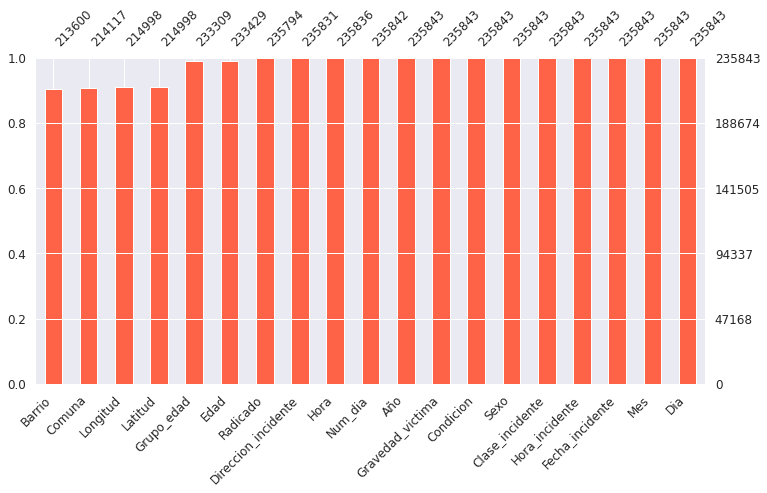

In [186]:
msno.bar(invia_without_invalid_df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato') 

In [187]:
invia_copy_df = invia_without_invalid_df.copy()

In [188]:
print("Cantidad de valores nulos en Direccion_incidente = {}/{}".format(invia_without_invalid_df.Direccion_incidente.isna().sum(), len(invia_without_invalid_df)))
print("Cantidad de valores nulos en Edad = {}/{}".format(invia_without_invalid_df.Edad.isna().sum(), len(invia_without_invalid_df)))
print("Cantidad de valores nulos en Num_dia = {}/{}".format(invia_without_invalid_df.Num_dia.isna().sum(), len(invia_without_invalid_df)))
print("Cantidad de valores nulos en Hora = {}/{}".format(invia_without_invalid_df.Hora.isna().sum(), len(invia_without_invalid_df)))
print("Cantidad de valores nulos en Grupo_edad = {}/{}".format(invia_without_invalid_df.Grupo_edad.isna().sum(), len(invia_without_invalid_df)))
print("Cantidad de valores nulos en Radicado = {}/{}".format(invia_without_invalid_df.Radicado.isna().sum(), len(invia_without_invalid_df)))
print("Cantidad de valores nulos en Latitud = {}/{}".format(invia_without_invalid_df.Latitud.isna().sum(), len(invia_without_invalid_df)))
print("Cantidad de valores nulos en Longitud = {}/{}".format(invia_without_invalid_df.Longitud.isna().sum(), len(invia_without_invalid_df)))
print("Cantidad de valores nulos en Comuna = {}/{}".format(invia_without_invalid_df.Comuna.isna().sum(), len(invia_without_invalid_df)))
print("Cantidad de valores nulos en Barrio = {}/{}".format(invia_without_invalid_df.Barrio.isna().sum(), len(invia_without_invalid_df)))

Cantidad de valores nulos en Direccion_incidente = 12/235843
Cantidad de valores nulos en Edad = 2414/235843
Cantidad de valores nulos en Num_dia = 1/235843
Cantidad de valores nulos en Hora = 7/235843
Cantidad de valores nulos en Grupo_edad = 2534/235843
Cantidad de valores nulos en Radicado = 49/235843
Cantidad de valores nulos en Latitud = 20845/235843
Cantidad de valores nulos en Longitud = 20845/235843
Cantidad de valores nulos en Comuna = 21726/235843
Cantidad de valores nulos en Barrio = 22243/235843


In [189]:
print("Proporción de valores nulos en Direccion_incidente = {0:.4f}".format(invia_without_invalid_df.Direccion_incidente.isna().sum()/len(invia_without_invalid_df)))
print("Proporción de valores nulos en Edad = {0:.4f}".format(invia_without_invalid_df.Edad.isna().sum()/len(invia_without_invalid_df)))
print("Proporción de valores nulos en Num_dia = {0:.4f}".format(invia_without_invalid_df.Num_dia.isna().sum()/len(invia_without_invalid_df)))
print("Proporción de valores nulos en Hora = {0:.4f}".format(invia_without_invalid_df.Hora.isna().sum()/len(invia_without_invalid_df)))
print("Proporción de valores nulos en Grupo_edad = {0:.4f}".format(invia_without_invalid_df.Grupo_edad.isna().sum()/len(invia_without_invalid_df)))
print("Proporción de valores nulos en Radicado = {0:.4f}".format(invia_without_invalid_df.Radicado.isna().sum()/len(invia_without_invalid_df)))
print("Proporción de valores nulos en Latitud = {0:.4f}".format(invia_without_invalid_df.Latitud.isna().sum()/len(invia_without_invalid_df)))
print("Proporción de valores nulos en Longitud = {0:.4f}".format(invia_without_invalid_df.Longitud.isna().sum()/len(invia_without_invalid_df)))
print("Proporción de valores nulos en Comuna = {0:.4f}".format(invia_without_invalid_df.Comuna.isna().sum()/len(invia_without_invalid_df)))
print("Proporción de valores nulos en Barrio = {0:.4f}".format(invia_without_invalid_df.Barrio.isna().sum()/len(invia_without_invalid_df)))

Proporción de valores nulos en Direccion_incidente = 0.0001
Proporción de valores nulos en Edad = 0.0102
Proporción de valores nulos en Num_dia = 0.0000
Proporción de valores nulos en Hora = 0.0000
Proporción de valores nulos en Grupo_edad = 0.0107
Proporción de valores nulos en Radicado = 0.0002
Proporción de valores nulos en Latitud = 0.0884
Proporción de valores nulos en Longitud = 0.0884
Proporción de valores nulos en Comuna = 0.0921
Proporción de valores nulos en Barrio = 0.0943


Las variables `Direccion_incidente`, `Num_dia`, `Hora` y `Radicado`, `Edad` y `Grupo_edad` poseen muy poco porcentaje de valores nulos. 

También veremos de imputar `Barrio` y `Comuna` a partir de la `Latitud` y `Longitud` no nulas.

### Análisis de valores extremos para numéricas

Veamos si podemos determinar valores extremos para las variables numéricas graficando boxplots

In [190]:
sns.set_context('talk')

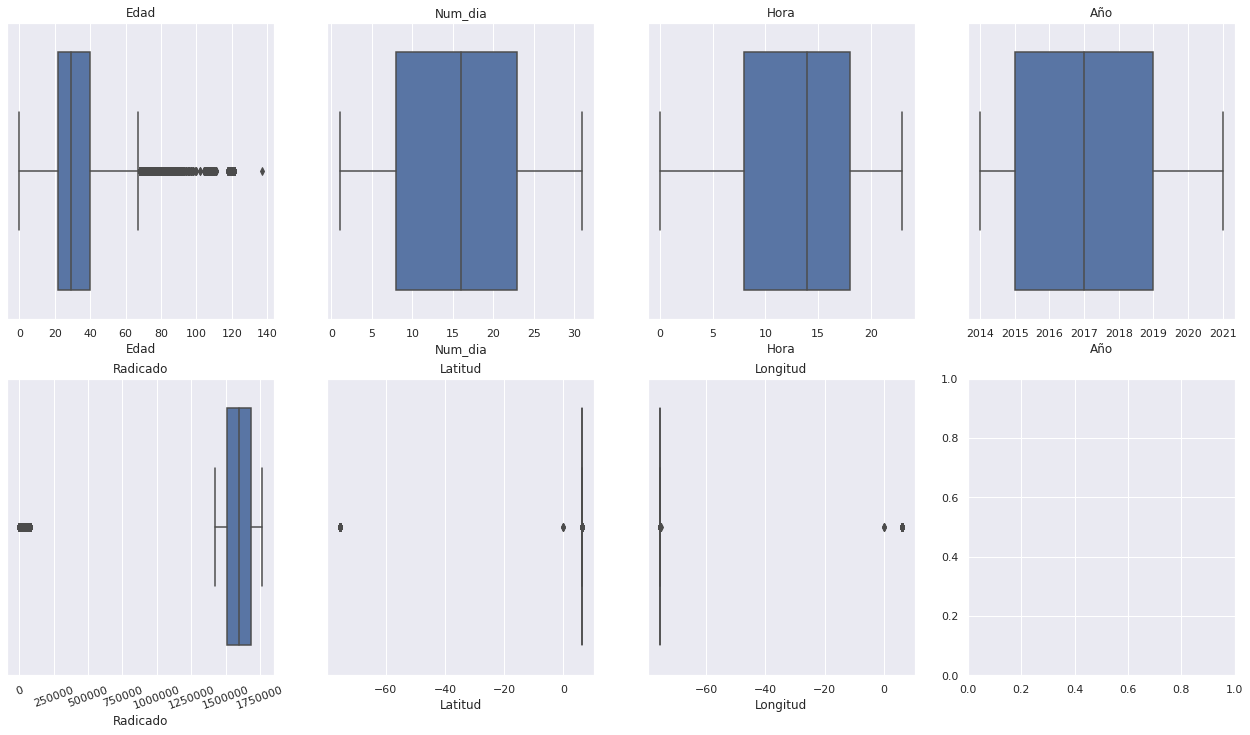

In [191]:
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22,12))

# Creamos 1 boxplot en cada subplot
axes[0,0].set_title('Edad')
sns.boxplot(data=invia_without_invalid_df, x='Edad', ax=axes[0,0])

axes[0,1].set_title('Num_dia')
sns.boxplot(data=invia_without_invalid_df, x='Num_dia', ax=axes[0,1])

axes[0,2].set_title('Hora')
sns.boxplot(data=invia_without_invalid_df, x='Hora', ax=axes[0,2])

axes[0,3].set_title('Año')
sns.boxplot(data=invia_without_invalid_df, x='Año', ax=axes[0,3])

axes[1,0].set_title('Radicado')
sns.boxplot(data=invia_without_invalid_df, x='Radicado', ax=axes[1,0])
axes[1,0].ticklabel_format(style='plain', axis='x')
axes[1,0].tick_params(labelrotation=20)

axes[1,1].set_title('Latitud')
sns.boxplot(data=invia_without_invalid_df, x='Latitud', ax=axes[1,1])
axes[1,1].ticklabel_format(style='plain', axis='x')

axes[1,2].set_title('Longitud')
sns.boxplot(data=invia_without_invalid_df, x='Longitud', ax=axes[1,2])
axes[1,2].ticklabel_format(style='plain', axis='x')

Las columna `Edad` se podría acotar luego de 100 años. 

`Radicado` si bien tiene valores extremos no la acotaremos ya que es solamente un identificador del incidente. 

Las otras columnas numéricas (`Num_dia`, `Hora`, `Año`) no tienen valores extremos.

Las columnas de `Latitud` y `Logitud` las veremos con más acercamiento a continuación.

### Eliminación de valores extremos de `Edad`, mayores a 100 años

In [192]:
invia_copy_df = invia_without_invalid_df.copy()

In [193]:
invia_copy_df.Edad.value_counts()

23.0     10621
22.0     10338
24.0     10212
21.0     10031
25.0      9837
         ...  
96.0         3
102.0        2
100.0        2
99.0         1
137.0        1
Name: Edad, Length: 115, dtype: int64

In [194]:
invia_copy_df.Edad.describe()

count    233429.000000
mean         32.400344
std          14.849399
min           0.000000
25%          22.000000
50%          29.000000
75%          40.000000
max         137.000000
Name: Edad, dtype: float64

In [195]:
print(len(invia_copy_df[invia_copy_df.Edad >= 100]),'/',len(invia_copy_df))
len(invia_copy_df[invia_copy_df.Edad >= 100])/len(invia_copy_df) 

556 / 235843


0.002357500540613883

In [196]:
print('\n',(invia_df[invia_df.Edad >= 100])[['Condicion', 'Gravedad_victima', 'Radicado']].Gravedad_victima.value_counts())
print('\n',(invia_df[invia_df.Edad >= 100])[['Condicion', 'Gravedad_victima', 'Radicado']].Condicion.value_counts())
print('\n',(invia_df[invia_df.Edad >= 100])[['Condicion', 'Gravedad_victima', 'Radicado']].Radicado.value_counts())


 Heridos    554
Muertos      2
Name: Gravedad_victima, dtype: int64

 Peatón                        227
Motociclista                  158
Acompañante de Motocicleta    116
Pasajero                       34
Conductor                      13
Ciclista                        8
Name: Condicion, dtype: int64

 1701585.0    3
1752888.0    2
1759854.0    2
1761302.0    2
1680185.0    2
            ..
1676676.0    1
1675952.0    1
1675502.0    1
1675425.0    1
1763767.0    1
Name: Radicado, Length: 549, dtype: int64


Es un porcentaje muy reducido de registros, lo cual nos parece conveniente de eliminar ya que deseamos adpotar un enfoque conservador para la eliminación de los datos; además recordemos que es un grupo de edad no representativo en este caso. 

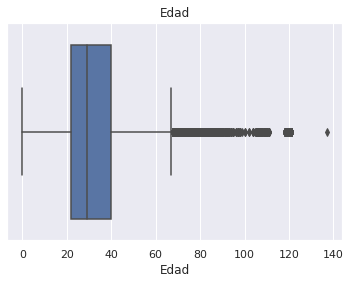

In [197]:
plt.title('Edad')
sns.boxplot(data=invia_df, x='Edad')

In [198]:
invia_copy_df = invia_copy_df[invia_copy_df.Edad <= 100]

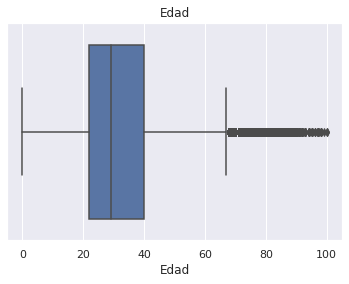

In [199]:
plt.title('Edad')
sns.boxplot(data=invia_copy_df, x='Edad')

---

### Tratamiento de `Latitud` y `Longitud`

In [200]:
invia_copy_df.Latitud.unique()

array([  6.26691466,   6.28935346,   6.23432737, ..., -75.57582422,
       -75.53631071, -75.54867484])

In [201]:
invia_copy_df.Longitud.unique()

array([-75.5590994 , -75.55329197, -75.60761079, ...,   6.2178952 ,
         6.23426695,   6.272697  ])

In [202]:
invia_copy_df[['Latitud', 'Longitud']]

,Latitud,Longitud
0,6.266915,-75.559099
1,6.289353,-75.553292
2,6.289353,-75.553292
3,6.234327,-75.607611
4,6.234327,-75.607611
...,...,...
235838,-75.536311,6.234267
235839,-75.536311,6.234267
235840,-75.548675,6.272697
235841,NaN,NaN


De [esta fuente](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj8yqaKgqT4AhXNv5UCHbdqD48QFnoECAgQAw&url=https%3A%2F%2Fwww.municipio.com.co%2Fmunicipio-medellin.html&usg=AOvVaw3Vav3G3Hg7QJnrikZ7PpV7) obtuvimos las coordenadas de el lugar de estudio Medellín, Colombia:

Coordenadas geográficas	Latitud: 6.217 Longitud: -75.567 Latitud: 6° 13' 1'' Norte Longitud: 75° 34' 1'' Oeste

Esto nos sugiere que hay registros de Latitud y de Longitud erróneos.

In [203]:
bad_lat_values_rows = invia_copy_df[invia_copy_df.Latitud < 0]

In [204]:
len(bad_lat_values_rows)

1949

In [205]:
bad_coor_values_rows = bad_lat_values_rows[bad_lat_values_rows.Longitud > 0]

In [206]:
len(bad_coor_values_rows)

1949

In [207]:
bad_coor_values_rows[['Latitud', 'Longitud']]

,Latitud,Longitud
233114,-75.549002,6.294822
233117,-75.576549,6.229241
233118,-75.576549,6.229241
233120,-75.585868,6.223170
233121,-75.585868,6.223170
...,...,...
235836,-75.585992,6.298268
235837,-75.575824,6.217895
235838,-75.536311,6.234267
235839,-75.536311,6.234267


Vemos que los valores de latitud y longitud de los registros incorrectos están al revés, el valor de latitud corresponde al valor de longitud y viceversa. Haremos una corrección en ambas para acomodar estos valores. 

In [208]:
ary = np.where(invia_copy_df.Latitud < 0, [invia_copy_df.Longitud,invia_copy_df.Latitud], [invia_copy_df.Latitud,invia_copy_df.Longitud])
np.unique(ary[0]), np.unique(ary[1])

(array([0.        , 6.15283496, 6.16684542, ..., 6.36798524, 6.36837538,
               nan]),
 array([-75.7039017 , -75.70381574, -75.70377628, ..., -75.45241299,
          0.        ,          nan]))

In [209]:
invia_copy_df['Latitud'] = ary[0]

In [210]:
invia_copy_df['Longitud'] = ary[1]

In [211]:
invia_copy_df['Latitud'].unique()

array([6.26691466, 6.28935346, 6.23432737, ..., 6.2232798 , 6.26022305,
       6.22921532])

In [212]:
invia_copy_df[['Latitud', 'Longitud']]

,Latitud,Longitud
0,6.266915,-75.559099
1,6.289353,-75.553292
2,6.289353,-75.553292
3,6.234327,-75.607611
4,6.234327,-75.607611
...,...,...
235838,6.234267,-75.536311
235839,6.234267,-75.536311
235840,6.272697,-75.548675
235841,NaN,NaN


In [213]:
invia_df[['Latitud', 'Longitud']]

,Latitud,Longitud
0,6.266915,-75.559099
1,6.289353,-75.553292
2,6.289353,-75.553292
3,6.234327,-75.607611
4,6.234327,-75.607611
...,...,...
235838,-75.536311,6.234267
235839,-75.536311,6.234267
235840,-75.548675,6.272697
235841,NaN,NaN


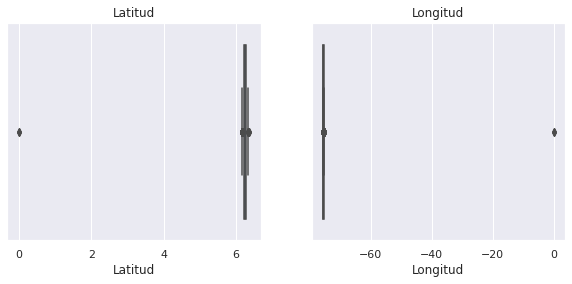

In [214]:
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

axes[0].set_title('Latitud')
sns.boxplot(data=invia_copy_df, x='Latitud', ax=axes[0])
axes[0].ticklabel_format(style='plain', axis='x')

axes[1].set_title('Longitud')
sns.boxplot(data=invia_copy_df, x='Longitud', ax=axes[1])
axes[1].ticklabel_format(style='plain', axis='x')

In [215]:
invia_copy_df[(invia_copy_df.Latitud == 0)]

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
227498,Heridos,2021-06-29,23:25:00,Choque,DG 80 CR 78,M,20.0,Motociclista,Jun,Mar,29.0,23.0,20 - 29,2021,1752580.0,0.0,0.0,NaN,NaN
227530,Heridos,2021-06-30,13:15:00,Choque,CL 12 CR 49,M,41.0,Motociclista,Jun,Mié,30.0,13.0,40 - 49,2021,1752484.0,0.0,0.0,NaN,NaN
227531,Heridos,2021-06-30,13:50:00,Choque,CR 63 CL 72,M,36.0,Motociclista,Jun,Mié,30.0,13.0,30 - 39,2021,1752585.0,0.0,0.0,NaN,NaN


In [216]:
invia_copy_df[(invia_copy_df.Longitud == 0)]
len(invia_copy_df)

232875

Debido a que sólo tenemos 3 registros con valor cero tanto en Longitud como en Latitud, los eliminaremos ya que no son representativos y un dato muy puntual no nos parece apropiado ni fácil de imputar, ya que no tenemos conocimiento del relevamiento de estos datos.

In [217]:
invia_copy_df = invia_copy_df[~(invia_copy_df.Longitud == 0)]
len(invia_copy_df)

232872

In [218]:
invia_copy_df[(invia_copy_df.Longitud == 0)]

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio


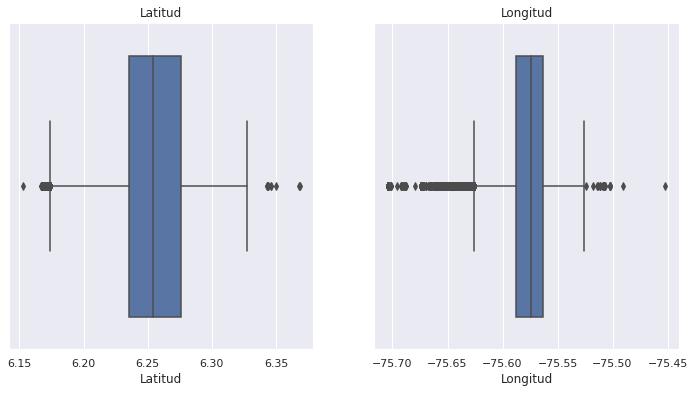

In [219]:
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

axes[0].set_title('Latitud')
sns.boxplot(data=invia_copy_df, x='Latitud', ax=axes[0])
axes[0].ticklabel_format(style='plain', axis='x')

axes[1].set_title('Longitud')
sns.boxplot(data=invia_copy_df, x='Longitud', ax=axes[1])
axes[1].ticklabel_format(style='plain', axis='x')

Teniendo en cuenta las coordenadas de Medellín, 6.217 Longitud: -75.567, la Longitud se ve más cercana al centro de la ciudad, mientras que la latitud un poco más alejada. 

In [220]:
invia_acoted_df = invia_copy_df.copy()

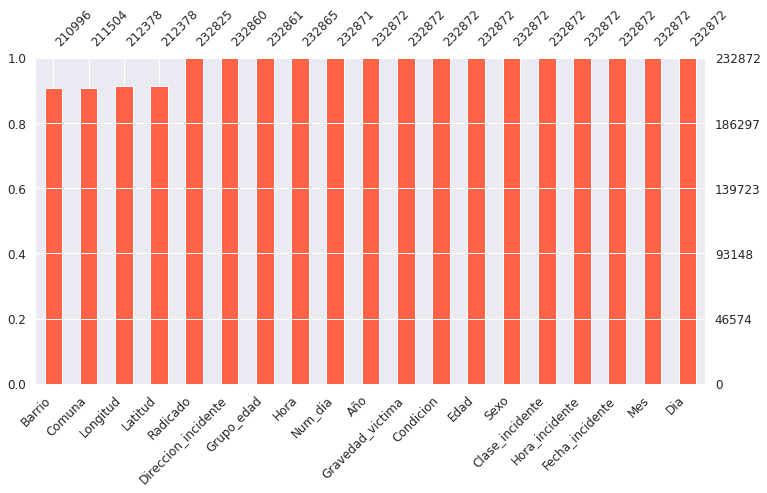

In [221]:
msno.bar(invia_acoted_df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato')
plt.savefig("datos_nulos.png")

### Análisis de la variable `Radicado`

Si queremos contar la cantidad de ocurrencias de accidentes viales, y vimos que Radicado tiene valores que se repiten (es decir, hay más de una persona involucrada en el accidente), como otro análisis consideraremos un sólo registro de los valores repetidos.

In [235]:
invia_copy_df.Radicado.value_counts()

1656780.0    34
1549032.0    33
1659473.0    24
1510395.0    24
1678108.0    18
             ..
1549065.0     1
1549037.0     1
1549133.0     1
1549054.0     1
1763946.0     1
Name: Radicado, Length: 186954, dtype: int64

In [234]:
invia_copy_df.groupby('Radicado').first()

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Latitud,Longitud,Comuna,Barrio
Radicado,,,,,,,,,,,,,,,,,,
12.0,Muertos,2017-01-01,05:05:00,Atropello,CL 77 A CR 88,M,70.0,Peatón,Ene,Dom,1.0,5.0,70 - 79,2017,6.282942,-75.591921,07 - Robledo,Aures No.1
15.0,Muertos,2017-12-04,10:45:00,Choque,CL 37 B CR 84,M,66.0,Motociclista,Dic,Lun,4.0,10.0,60 - 69,2017,6.245762,-75.606022,12 - La América,Simón Bolívar
20.0,Muertos,2017-01-01,08:30:00,Choque,CL 66 CR 103 B - 15,M,33.0,Motociclista,Ene,Dom,1.0,8.0,30 - 39,2017,6.284049,-75.613491,60 - Corregimiento de San Cristóbal,Área de Expansión Pajarito
38.0,Muertos,2014-11-25,00:33:00,Atropello,CR 84 CL 44 - 05,F,66.0,Peatón,Nov,Mar,25.0,0.0,60 - 69,2014,6.250820,-75.604448,12 - La América,La América
47.0,Muertos,2017-01-02,01:30:00,Choque,CR 42 CL 92 - 50,M,23.0,Motociclista,Ene,Lun,2.0,1.0,20 - 29,2017,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764153.0,Heridos,2021-09-29,01:05:00,Choque,CR 62 CL 55,M,22.0,Conductor,Sept,Mié,29.0,1.0,20 - 29,2021,NaN,NaN,None,None
1764157.0,Heridos,2021-09-29,08:38:00,Choque,CR 48 CL 59,F,42.0,Motociclista,Sept,Mié,29.0,8.0,40 - 49,2021,6.255895,-75.562341,10 - La Candelaria,Prado
1764160.0,Heridos,2021-09-28,14:02:00,Choque,CL 5 A CR 39,M,39.0,Motociclista,Sept,Mar,28.0,14.0,30 - 39,2021,6.204594,-75.569029,14 - El Poblado,La Florida


In [225]:
len(invia_copy_df.Radicado.value_counts() > 1)

186954

In [57]:
invia_copy_df.Radicado.value_counts()

1656780.0    34
1549032.0    33
1659473.0    24
1510395.0    24
1678108.0    18
             ..
1549065.0     1
1549037.0     1
1549133.0     1
1549054.0     1
1763946.0     1
Name: Radicado, Length: 186954, dtype: int64

In [58]:
(invia_copy_df.Radicado.value_counts() > 1).index

Float64Index([1656780.0, 1549032.0, 1659473.0, 1510395.0, 1678108.0, 1539098.0,
              1757997.0, 1501128.0, 1742462.0, 1483494.0,
              ...
              1549060.0, 1549149.0, 1549067.0, 1549035.0, 1549145.0, 1549065.0,
              1549037.0, 1549133.0, 1549054.0, 1763946.0],
             dtype='float64', length=186954)

In [59]:
# guardamos los valores de Radicado que se repiten
multiple_radic_values = (invia_copy_df.Radicado.value_counts() > 1).index.tolist()

In [60]:
len(multiple_radic_values)

186954

In [61]:
cols = invia_copy_df.columns
interesting_cols = [cols[0], cols[5], cols[7], cols[12]]
interesting_cols

['Gravedad_victima', 'Sexo', 'Condicion', 'Grupo_edad']

In [62]:
rad_notna_df = invia_copy_df[invia_copy_df.Radicado.notnull()]
len(rad_notna_df)

232825

In [63]:
# Recolectar un solo índice para cada grupo de Radicado repetido
# para los 235794 tardó media ahora aprox
one_rad_indices = []
for r in multiple_radic_values:
  rad_rows = rad_notna_df[(rad_notna_df.Radicado == r)]
  one_rad_indices.append(rad_rows.index[0])

In [64]:
len(one_rad_indices)

186954

In [65]:
# Guardamos los valores de índices en un archivo ya que tarda bastante en ejecutarse lo anterior
with open('radicandos.txt', 'w') as writefile:
    for item in one_rad_indices:
        writefile.write(str(item)+',')

La idea es crear un dataframe con estos índices recolectados, y concatenarlo con un dataframe que contenga los Radicados no repetidos originales. Sin embargo, esta tarea la vemos más centralizada en un análisis para una predicción, que no nos compete en el propósito de este laboratorio.

### Análisis de `Sexo` de la `Condicion` que refiera a una persona a cargo de un vehículo

Como otro análisis y visualización, que quizá nos sirva también para una posible predicción en los prácticos siguientes, nos interesa saber el porcentaje de sexo en personas a cargo de un vehículo en las incidentes viales ocurridas.

In [67]:
invia_copy_df.Condicion.unique()

array(['Motociclista', 'Peatón', 'Acompañante de Motocicleta',
       'Conductor', 'Ciclista', 'Pasajero'], dtype=object)

In [68]:
drive_condition = np.array(['Conductor', 'Motociclista', 'Ciclista'])

In [69]:
rows_with_drive_condition = invia_copy_df[invia_copy_df.Condicion.isin(drive_condition)]

In [70]:
len(rows_with_drive_condition)

151923

In [71]:
frec = rows_with_drive_condition.Sexo.value_counts()
frec

M          120723
F           29384
Sin Inf      1816
Name: Sexo, dtype: int64

In [72]:
print("Proporción de Sexo M = {0:.4f}".format(frec['M']/len(rows_with_drive_condition)))
print("Proporción de Sexo F = {0:.4f}".format(frec['F']/len(rows_with_drive_condition)))
print("Proporción de Sexo Sin Inf = {0:.4f}".format(frec['Sin Inf']/len(rows_with_drive_condition)))

Proporción de Sexo M = 0.7946
Proporción de Sexo F = 0.1934
Proporción de Sexo Sin Inf = 0.0120


In [73]:
sexs_labels = invia_df.Sexo.unique()

([<matplotlib.patches.Wedge at 0x7f01bd579a90>,
 [Text(-0.8788906190433315, 0.6614765904834651, 'M'),
  Text(0.853436485866711, -0.6940073231540711, 'F'),
  Text(1.099224469524399, -0.04129849390478835, 'Sin Inf')],
 [Text(-0.47939488311454437, 0.36080541299098096, '79.5%'),
  Text(0.4655108104727514, -0.37854944899312964, '19.3%'),
  Text(0.5995769833769448, -0.02252645122079364, '1.2%')])

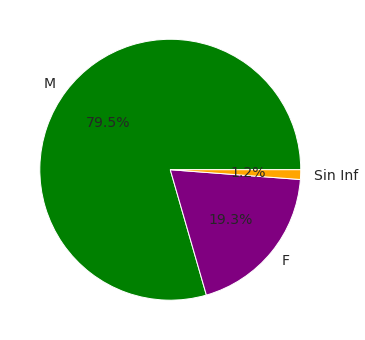

In [74]:
fig = plt.figure(figsize=(6,6))
plt.pie(frec,
        explode=None, 
        labels=sexs_labels, 
        colors=['green', 'purple', 'orange'], 
        textprops={"fontsize":14},
        autopct='%.1f%%'
)

----

### Imputación de `Barrio` y `Comuna` a partir de los valores no nulos de `Latitud` y `Longitud`

In [75]:
len(invia_copy_df[(invia_copy_df.Latitud.notnull()) & (invia_copy_df.Longitud.notnull())])

212378

In [76]:
len(invia_copy_df[(invia_copy_df.Latitud.notnull()) & (invia_copy_df.Longitud.notnull())])

212378

In [77]:
invia_copy_df.Comuna.value_counts()

10 - La Candelaria                                 36464
05 - Castilla                                      22617
11 - Laureles Estadio                              19682
07 - Robledo                                       16495
04 - Aranjuez                                      14348
15 - Guayabal                                      14207
16 - Belén                                         13498
14 - El Poblado                                    12100
09 - Buenos Aires                                   9330
03 - Manrique                                       9311
06 - Doce de Octubre                                8099
08 - Villa Hermosa                                  7635
12 - La América                                     6728
13 - San Javier                                     4955
01 - Popular                                        4392
02 - Santa Cruz                                     3711
80 - Corregimiento de San Antonio de Prado          3532
60 - Corregimiento de San Crist

In [78]:
invia_copy_df.Comuna.isnull().sum()

21368

In [79]:
rows_comuna_to_impute = invia_copy_df[
                                (invia_copy_df.Comuna.isna()) &
                                (invia_copy_df.Latitud.notnull()) & \
                                (invia_copy_df.Longitud.notnull())
                      ]

len(rows_comuna_to_impute)

875

In [80]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

In [81]:
# Tarda entre 10min y 15min
comuna_dictionary = {} 
for c in range(rows_comuna_to_impute.shape[0]):
  address = ''
  latitude = str(rows_comuna_to_impute.iloc[c].Latitud)
  longitude = str(rows_comuna_to_impute.iloc[c].Longitud)
  location = geolocator.reverse(latitude+","+longitude)

  address = location.raw['address']
  comuna = address.get('city_district', '')
  if comuna and invia_df[invia_df.Comuna.str.contains(comuna, case=False)].Comuna.unique():
    comuna_dictionary.update({ rows_comuna_to_impute.index[c]: comuna })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()


In [82]:
np.unique(np.array(list(comuna_dictionary.values())))

array(['San Antonio de Prado'], dtype='<U20')

In [83]:
len(comuna_dictionary)

873

In [84]:
invia_df[invia_df.Comuna.str.contains('San Antonio de Prado', case=False)].Comuna.unique()

array(['80 - Corregimiento de San Antonio de Prado'], dtype=object)

In [85]:
comuna_dictionary_new = comuna_dictionary.copy()
for k,v in comuna_dictionary.items():
  if v == 'San Antonio de Prado':
    comuna_dictionary_new[k] = '80 - Corregimiento de San Antonio de Prado'

In [86]:
np.unique(np.array(list(comuna_dictionary.values())))

array(['San Antonio de Prado'], dtype='<U20')

In [87]:
invia_copy_df['Comuna'] = invia_copy_df['Comuna'].fillna(comuna_dictionary_new)

In [88]:
invia_copy_df.Comuna.isna().sum()

20495

In [89]:
invia_copy_df.Comuna.value_counts()

10 - La Candelaria                                 36464
05 - Castilla                                      22617
11 - Laureles Estadio                              19682
07 - Robledo                                       16495
04 - Aranjuez                                      14348
15 - Guayabal                                      14207
16 - Belén                                         13498
14 - El Poblado                                    12100
09 - Buenos Aires                                   9330
03 - Manrique                                       9311
06 - Doce de Octubre                                8099
08 - Villa Hermosa                                  7635
12 - La América                                     6728
13 - San Javier                                     4955
80 - Corregimiento de San Antonio de Prado          4405
01 - Popular                                        4392
02 - Santa Cruz                                     3711
60 - Corregimiento de San Crist

In [90]:
invia_copy_df[(invia_copy_df.Comuna.isna()) &
              (invia_copy_df.Latitud.notnull()) & \
              (invia_copy_df.Longitud.notnull())
]

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
227418,Heridos,2021-06-28,22:30:00,Caida Ocupante,Tramo 7 Kilometro 25,F,29.0,Motociclista,Jun,Lun,28.0,22.0,20 - 29,2021,1752433.0,6.176400,-75.452413,NaN,NaN
232344,Heridos,2021-08-23,07:00:00,Otro,CL 12 Sur CR 50,F,32.0,Motociclista,Ago,Lun,23.0,7.0,30 - 39,2021,1758863.0,6.195415,-75.581810,NaN,NaN


In [91]:
invia_copy_df.loc[np.array(list(comuna_dictionary_new.keys()))][['Comuna', 'Barrio', 'Latitud', 'Longitud']]

,Comuna,Barrio,Latitud,Longitud
225331,80 - Corregimiento de San Antonio de Prado,NaN,6.221784,-75.703902
225335,80 - Corregimiento de San Antonio de Prado,NaN,6.221784,-75.703902
225346,80 - Corregimiento de San Antonio de Prado,NaN,6.221784,-75.703902
225347,80 - Corregimiento de San Antonio de Prado,NaN,6.221784,-75.703902
225348,80 - Corregimiento de San Antonio de Prado,NaN,6.221784,-75.703902
...,...,...,...,...
230323,80 - Corregimiento de San Antonio de Prado,NaN,6.221784,-75.703902
230335,80 - Corregimiento de San Antonio de Prado,NaN,6.221784,-75.703902
230340,80 - Corregimiento de San Antonio de Prado,NaN,6.221784,-75.703902
230344,80 - Corregimiento de San Antonio de Prado,NaN,6.221784,-75.703902


---

In [92]:
invia_copy_df.Barrio.value_counts()

Caribe                      3864
La Candelaria               3749
Perpetuo Socorro            3716
Campo Amor                  3559
Santa Fé                    3248
                            ... 
Pablo Vi                       1
1114                           1
Terminal De Transporte         1
Universidad De Antioquia       1
9004                           1
Name: Barrio, Length: 363, dtype: int64

In [93]:
invia_copy_df.Barrio.isnull().sum()

21876

In [94]:
# barrio_null_rows_with_not_null_coords
rows_barrio_to_impute = invia_copy_df[
                                (invia_copy_df.Barrio.isna()) &
                                (invia_copy_df.Latitud.notnull()) & \
                                (invia_copy_df.Longitud.notnull())
                      ]

len(rows_barrio_to_impute)

1382

In [95]:
barrio_notna_df = invia_df[invia_df.Barrio.notna()]

In [96]:
# Tarda entre 10min y 15min
barrio_dictionary = {}
for b in range(rows_barrio_to_impute.shape[0]):
  address = ''
  latitude = str(rows_barrio_to_impute.iloc[b].Latitud)
  longitude = str(rows_barrio_to_impute.iloc[b].Longitud)
  location = geolocator.reverse(latitude+","+longitude)

  address = location.raw['address']
  barrio = address.get('hamlet', '')
  if barrio and barrio_notna_df[barrio_notna_df.Barrio.str.contains(barrio, case=False)].Barrio.unique():
      barrio_dictionary.update({ rows_barrio_to_impute.index[b]: barrio })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()


In [97]:
miss_barrios = np.unique(np.array(list(barrio_dictionary.values())))
miss_barrios

array(['Media Luna', 'San Isidro'], dtype='<U10')

In [98]:
invia_copy_df['Barrio'] = invia_copy_df['Barrio'].fillna(barrio_dictionary)

In [99]:
invia_copy_df.loc[np.array(list(barrio_dictionary.keys()))][['Comuna', 'Barrio', 'Latitud', 'Longitud']]

,Comuna,Barrio,Latitud,Longitud
42109,16 - Belén,San Isidro,6.221806,-75.703816
43574,60 - Corregimiento de San Cristóbal,San Isidro,6.221806,-75.703816
43891,09 - Buenos Aires,San Isidro,6.221806,-75.703816
50123,80 - Corregimiento de San Antonio de Prado,San Isidro,6.221806,-75.703816
50133,13 - San Javier,San Isidro,6.221806,-75.703816
...,...,...,...,...
230323,80 - Corregimiento de San Antonio de Prado,San Isidro,6.221784,-75.703902
230335,80 - Corregimiento de San Antonio de Prado,San Isidro,6.221784,-75.703902
230340,80 - Corregimiento de San Antonio de Prado,San Isidro,6.221784,-75.703902
230344,80 - Corregimiento de San Antonio de Prado,San Isidro,6.221784,-75.703902


---

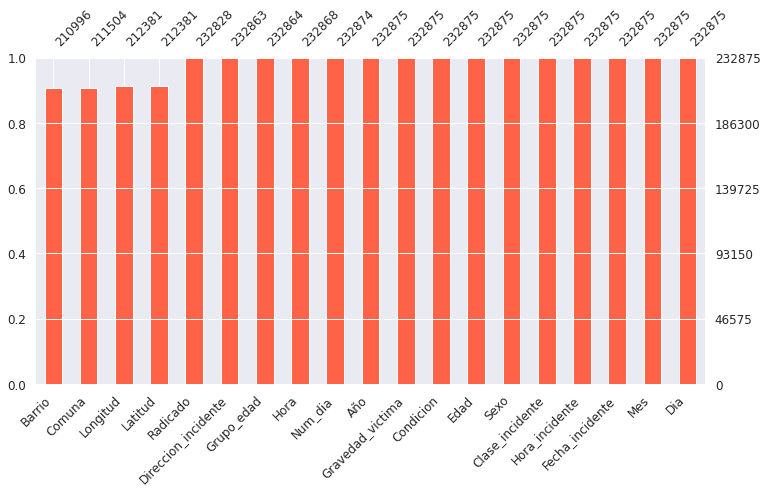

In [100]:
msno.bar(invia_acoted_df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato') 

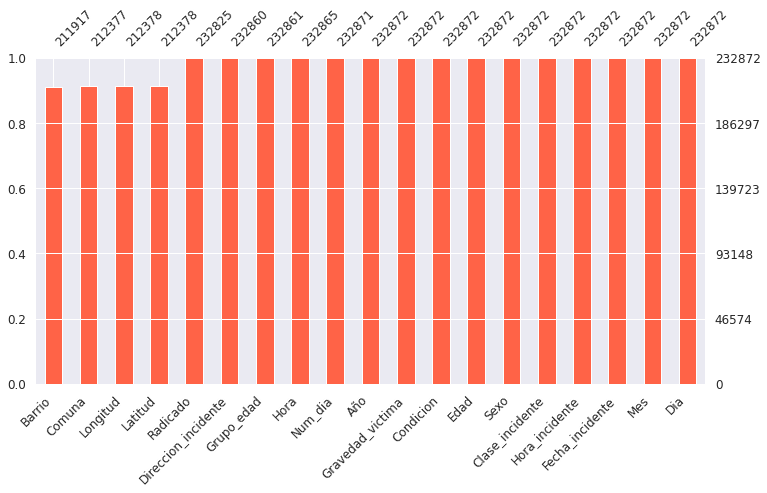

In [101]:
msno.bar(invia_copy_df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato') 

In [166]:
invia_acoted_df.isnull().sum()

Gravedad_victima           0
Fecha_incidente            0
Hora_incidente             0
Clase_incidente            0
Direccion_incidente       12
Sexo                       0
Edad                       0
Condicion                  0
Mes                        0
Dia                        0
Num_dia                    1
Hora                       7
Grupo_edad                11
Año                        0
Radicado                  47
Latitud                20494
Longitud               20494
Comuna                 21368
Barrio                 21876
dtype: int64

In [103]:
invia_copy_df.isnull().sum()

Gravedad_victima           0
Fecha_incidente            0
Hora_incidente             0
Clase_incidente            0
Direccion_incidente       12
Sexo                       0
Edad                       0
Condicion                  0
Mes                        0
Dia                        0
Num_dia                    1
Hora                       7
Grupo_edad                11
Año                        0
Radicado                  47
Latitud                20494
Longitud               20494
Comuna                 20495
Barrio                 20955
dtype: int64

Comparando las visualizaciones podemos notar que Comuna y Barrio presentan menores datos nulos.

### Resultado de las visualizaciones de `Latitud` y `Longitud`

In [108]:
selected_barrios = invia_copy_df.Barrio.value_counts().index[:20].tolist()
selected_barrios

['Caribe',
 'La Candelaria',
 'Perpetuo Socorro',
 'Campo Amor',
 'Santa Fé',
 'Cabecera San Antonio de Prado',
 'Castilla',
 'Barrio Colón',
 'Los Conquistadores',
 'Villa Nueva',
 'San Benito',
 'Los Colores',
 'Carlos E. Restrepo',
 'Terminal de Transporte',
 'Prado',
 'San Isidro',
 'Naranjal',
 'Boston',
 'Guayaquil',
 'San Diego']

In [109]:
selected_barrios_df = invia_copy_df[invia_copy_df.Barrio.isin(selected_barrios)]

In [110]:
agrp_imp_barrio_df = selected_barrios_df.groupby(['Barrio', 'Latitud', 'Longitud'])['Clase_incidente'].count().reset_index()
agrp_imp_barrio_df

,Barrio,Latitud,Longitud,Clase_incidente
0,Barrio Colón,6.237482,-75.570388,3
1,Barrio Colón,6.237485,-75.570433,11
2,Barrio Colón,6.237502,-75.570410,44
3,Barrio Colón,6.237509,-75.570951,6
4,Barrio Colón,6.237509,-75.570950,3
...,...,...,...,...
5484,Villa Nueva,6.256023,-75.564100,11
5485,Villa Nueva,6.256355,-75.564988,3
5486,Villa Nueva,6.256358,-75.564911,26
5487,Villa Nueva,6.256597,-75.565315,1


In [111]:
coordinates = list(zip(invia_copy_df.Longitud, invia_copy_df.Latitud))

In [112]:
token = 'pk.eyJ1IjoidmdhcmllbCIsImEiOiJjbDNkNTkzYWswMDJhM2lxczlndzk5YjBmIn0.CQG2v9YCWN3ABAi_gJNG1Q'

fig = go.Figure(go.Scattermapbox(
                lon = agrp_imp_barrio_df.Longitud,
                lat = agrp_imp_barrio_df.Latitud,
                mode = "markers+text",
                marker = go.scattermapbox.Marker(size = agrp_imp_barrio_df.Clase_incidente,
                                                 color = agrp_imp_barrio_df.Clase_incidente,
                                                 colorscale = 'Edge',
                                                 showscale = True,
                                                 sizemode = 'diameter',
                                                 opacity = 0.8),
hoverinfo = 'text',
hovertext = '<b>Barrio</b>: ' + agrp_imp_barrio_df['Barrio'].astype(str) + '<br>'
            '<b>Cantidad de Incidentes</b>: ' + agrp_imp_barrio_df['Clase_incidente'].astype(str) + '<br>'))

fig.update_layout(
    hovermode='x',
    margin = dict(r=0, l=0, b=0, t=0),
    mapbox = dict(accesstoken=token, style='stamen-terrain', 
                  zoom=10, center=dict(lat=6.24659, lon= -75.57967)),
    showlegend = True,
    autosize = True                
)